# Titanic EDA Lab

### Having insights into your data can be the difference between sinking or swimming on a project. Here we'll dive into some Exploratory Data Analysis techniques on the iconic Titanic data set.


## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
3. Download the `train.csv` file into this project
4. Load the csv into pandas.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data
Note: `NaN`, empty, and missing are synonymous.

2a) Create a bar chart showing how many missing values are in each column

In [15]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
values = train.isna().sum()

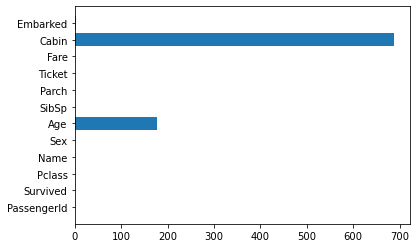

In [19]:
plt.barh(y=train.columns,width=values);

2b) Which column has the most `NaN` values? How many cells in that column are empty?

### Cabin has the most Nan values with a total of 687 

2c) Delete all rows where `Embarked` is empty

In [21]:
train.Embarked.dropna(axis=0,inplace=True)

2d) Fill all empty cabins with **¯\\_(ツ)_/¯**

In [22]:
train['Cabin'].replace(np.NaN,"¯\(ツ)/¯",inplace=True)
train.Cabin.head()


0    ¯\(ツ)/¯
1        C85
2    ¯\(ツ)/¯
3       C123
4    ¯\(ツ)/¯
Name: Cabin, dtype: object

## Step 3: Feature extraction
3a)  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [23]:
train = train.assign(FamilyCount = train['SibSp'] + train['Parch'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


3b) Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [26]:
Preacher = []
for name in train['Name']:
    if 'Rev' in name:
        name = '1'
        Preacher.append(name)
    else:
        name = '0'
        Preacher.append(name)

train = train.assign(IsReverend = Preacher)
train['IsReverend'].value_counts()



        
            
    

0    885
1      6
Name: IsReverend, dtype: int64

3c) In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  1. Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  

In [27]:
dummies = pd.get_dummies(train['Embarked'])
train = train.assign(Embarked_C = dummies['C'], Embarked_Q = dummies['Q'], Embarked_S = dummies['S'])
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


  2. Do the same thing for `Sex`
  

In [28]:
gender = pd.get_dummies(train.Sex)
train = train.assign(Female = gender['female'], Male = gender['male'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


  3. BONUS: Extract the title from everyone's name and create dummy columns

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


## Step 4: Exploratory analysis
4a) What was the survival rate overall?

In [ ]:
train.Survived.mean()

0.3838383838383838

4b) Which gender fared the worst? What was their survival rate?

In [ ]:
Male_stats = train.Survived & train.Male
Female_stats = train.Survived & train.Female
print(Male_stats.mean(),Female_stats.mean())
#Men have a lower survival rate of 12%

0.122334455667789 0.2615039281705948


4c) What was the survival rate for each `Pclass`?

In [ ]:
Pclass_stats = train.Survived & train.Pclass
Pclass_stats.mean()

0.28619528619528617

<AxesSubplot:>

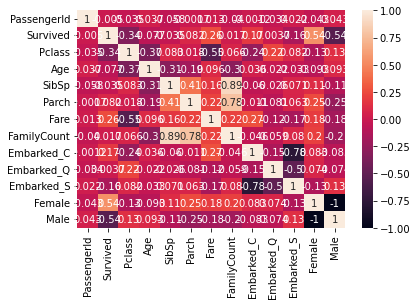

In [283]:
sns.heatmap(train.corr(), annot=True)